In [300]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [255]:
users = pd.read_csv('users.csv')
views = pd.read_csv('views.csv')
duration = pd.read_csv('duration.csv')

In [256]:
users['users'] = users['users'].str.replace('\xa0', '').str.replace(' ', '').astype(int)
views['views'] = views['views'].str.replace('\xa0', '').str.replace(' ', '').astype(int)
duration['duration'] = pd.to_timedelta(duration['duration']).dt.total_seconds()

In [257]:
users['date'] = pd.to_datetime(users['date'], format='%d.%m.%Y')
views['date'] = pd.to_datetime(views['date'], format='%d.%m.%Y')
duration['date'] = pd.to_datetime(duration['date'], format='%d.%m.%Y')

In [258]:
users

,date,users
0,2023-01-01,1249
1,2023-01-02,1560
2,2023-01-03,2481
3,2023-01-04,2365
4,2023-01-05,3062
...,...,...
147,2023-05-28,1380
148,2023-05-29,1779
149,2023-05-30,2512
150,2023-05-31,2475


In [259]:
views

,date,views
0,2023-01-01,5128
1,2023-01-02,6557
2,2023-01-03,11637
3,2023-01-04,11159
4,2023-01-05,16746
...,...,...
147,2023-05-28,5359
148,2023-05-29,6468
149,2023-05-30,11153
150,2023-05-31,11412


In [260]:
duration

,date,duration
0,2023-01-01,156.0
1,2023-01-02,169.0
2,2023-01-03,183.0
3,2023-01-04,186.0
4,2023-01-05,204.0
...,...,...
147,2023-05-28,165.0
148,2023-05-29,146.0
149,2023-05-30,169.0
150,2023-05-31,183.0


In [261]:
def draw_anomaly(data, anomaly):
    plt.figure(figsize=(10, 6))
    date, prop, _ = data.columns
    plt.plot(data[date], data[prop], label=prop)
    plt.scatter(anomaly[date], anomaly[prop], color='red', label='anomalies')
    plt.title(f'{prop} anomalies')
    plt.xlabel(date)
    plt.ylabel(prop)
    plt.legend()
    plt.grid(True)
    plt.show()

In [262]:
users['zscore'] = zscore(users['users'])
views['zscore'] = zscore(views['views'])
duration['zscore'] = zscore(duration['duration'])

In [263]:
anomalies_users = users[abs(users['zscore']) > 3]
anomalies_views = views[abs(views['zscore']) > 3]
anomalies_duration = duration[abs(duration['zscore']) > 3]

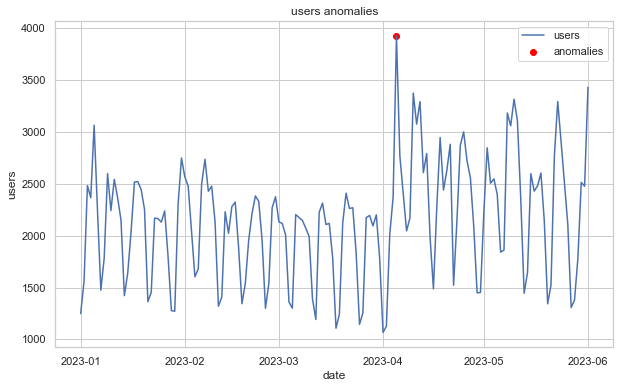

In [264]:
draw_anomaly(users, anomalies_users)

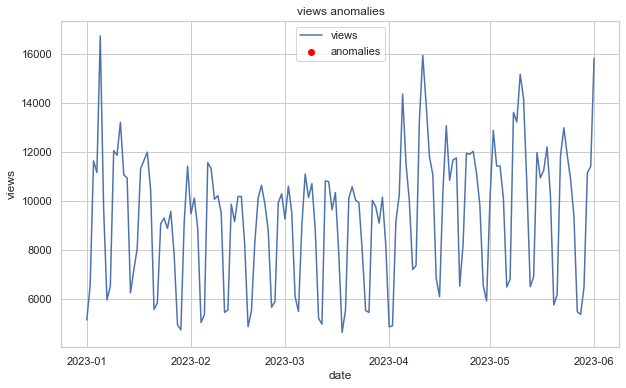

In [265]:
draw_anomaly(views, anomalies_views)

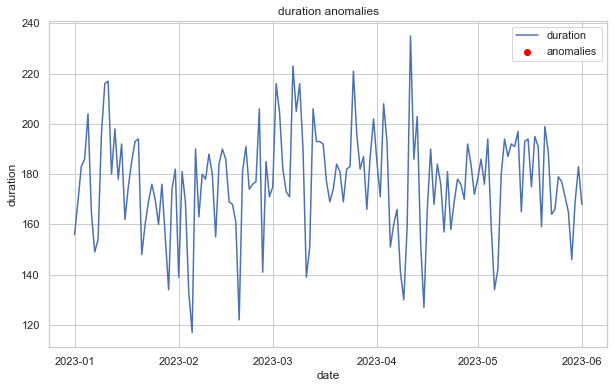

In [266]:
draw_anomaly(duration, anomalies_duration)

In [288]:
def isolation_forest(data):
    prop = data.columns[1]
    if_ = IsolationForest(n_estimators=100, contamination='auto')
    return data[if_.fit_predict(data[[prop]]) == -1]

In [289]:
if_anomalies_users = isolation_forest(users)
if_anomalies_views = isolation_forest(views)
if_anomalies_duration = isolation_forest(duration)

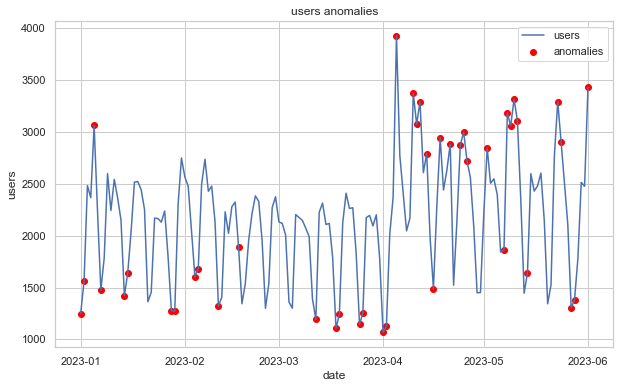

In [290]:
draw_anomaly(users, if_anomalies_users)

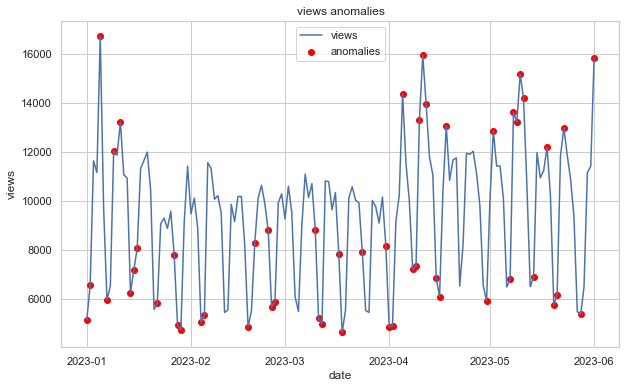

In [291]:
draw_anomaly(views, if_anomalies_views)

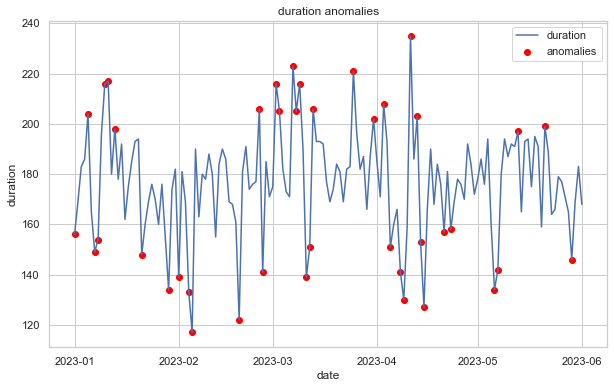

In [292]:
draw_anomaly(duration, if_anomalies_duration)

In [303]:
def lof(data):
    prop = data.columns[1]
    lof_ = LocalOutlierFactor(n_neighbors=20, contamination='auto')
    return data[lof_.fit_predict(data[[prop]]) == -1]

In [304]:
lof_anomalies_users = lof(users)
lof_anomalies_views = lof(views)
lof_anomalies_duration = lof(duration)

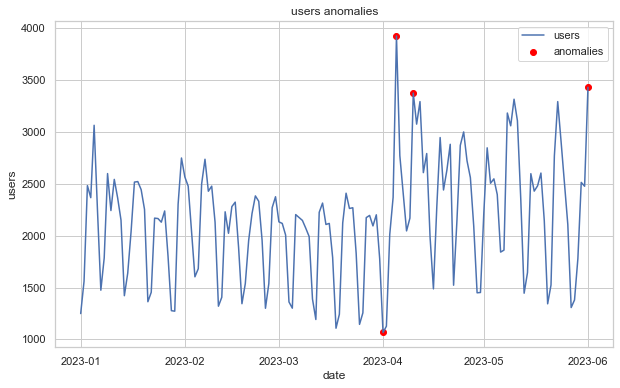

In [306]:
draw_anomaly(users, lof_anomalies_users)

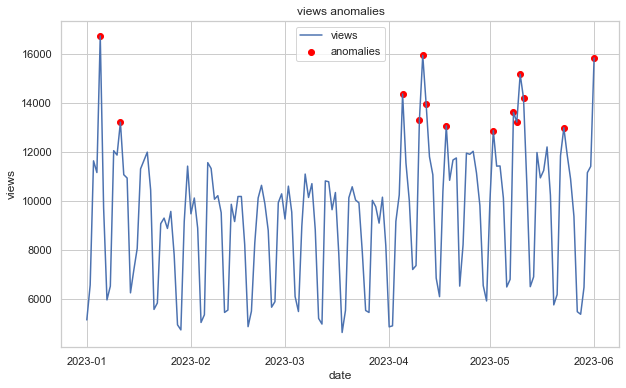

In [307]:
draw_anomaly(views, lof_anomalies_views)

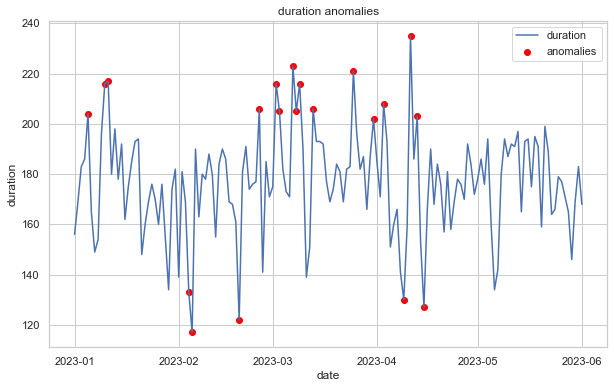

In [308]:
draw_anomaly(duration, lof_anomalies_duration)